In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/hackathon/hackathon')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder


In [6]:
df_duration = pd.read_csv('updated_file_with_call_duration.csv')
df_reason = pd.read_csv('customer reason.csv')

In [7]:
print(df_duration.head())
print(df_reason.head())

      call_id  customer_id  agent_id  call_start_datetime  \
0  4667960400   2033123310    963118  2024-07-31 23:56:00   
1  1122072124   8186702651    519057  2024-08-01 00:03:00   
2  6834291559   2416856629    158319  2024-07-31 23:59:00   
3  2266439882   1154544516    488324  2024-08-01 00:05:00   
4  1211603231   5214456437    721730  2024-08-01 00:04:00   

  agent_assigned_datetime    call_end_datetime  \
0           8/1/2024 0:03  2024-08-01 00:34:00   
1           8/1/2024 0:06  2024-08-01 00:18:00   
2           8/1/2024 0:07  2024-08-01 00:26:00   
3           8/1/2024 0:10  2024-08-01 00:17:00   
4           8/1/2024 0:14  2024-08-01 00:23:00   

                                     call_transcript  call_duration  
0  \n\nAgent: Thank you for calling United Airlin...           38.0  
1  \n\nAgent: Thank you for calling United Airlin...           15.0  
2  \n\nAgent: Thank you for calling United Airlin...           27.0  
3  \n\nAgent: Thank you for calling United Airlin...

In [9]:
merged_df = pd.merge(df_duration, df_reason, on='call_id')
print(merged_df.head())

      call_id  customer_id  agent_id  call_start_datetime  \
0  4667960400   2033123310    963118  2024-07-31 23:56:00   
1  1122072124   8186702651    519057  2024-08-01 00:03:00   
2  6834291559   2416856629    158319  2024-07-31 23:59:00   
3  2266439882   1154544516    488324  2024-08-01 00:05:00   
4  1211603231   5214456437    721730  2024-08-01 00:04:00   

  agent_assigned_datetime    call_end_datetime  \
0           8/1/2024 0:03  2024-08-01 00:34:00   
1           8/1/2024 0:06  2024-08-01 00:18:00   
2           8/1/2024 0:07  2024-08-01 00:26:00   
3           8/1/2024 0:10  2024-08-01 00:17:00   
4           8/1/2024 0:14  2024-08-01 00:23:00   

                                     call_transcript  call_duration  \
0  \n\nAgent: Thank you for calling United Airlin...           38.0   
1  \n\nAgent: Thank you for calling United Airlin...           15.0   
2  \n\nAgent: Thank you for calling United Airlin...           27.0   
3  \n\nAgent: Thank you for calling United Airli

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
merged_df['primary_call_reasons'] = label_encoder.fit_transform(merged_df['primary_call_reason'])

print(merged_df[['primary_call_reason', 'primary_call_reasons']].head())

  primary_call_reason  primary_call_reasons
0   Voluntary  Cancel                    48
1             Booking                     3
2              IRROPS                    20
3             Upgrade                    45
4             Seating                    37


In [14]:
correlation = merged_df['call_duration'].corr(merged_df['primary_call_reasons'])
print(f"Correlation between call_duration and primary_call_reason: {correlation}")

Correlation between call_duration and primary_call_reason: 0.04655584889569231


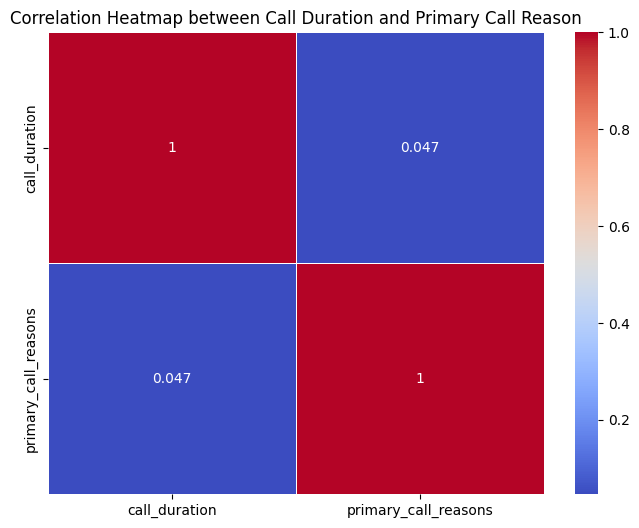

In [15]:
correlation_matrix = merged_df[['call_duration', 'primary_call_reasons']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap between Call Duration and Primary Call Reason')
plt.show()

**Correlation between call duration and call reason is comming out to be 0.47.
A 0.47 correlation suggests that call reason may have some impact on duration of calls, but the realtionship is not very strong. Correlation of 0.47 shows that there is a tendency for certain primary call reasons to be associated with longer or shorter call durations, but other factors might also be influencing call duration.**